<a href="https://colab.research.google.com/github/Vinamrath/Data-Analysis-with-Python/blob/main/Projects/Titanic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np

print("My Data Analysis Environment is Ready!")

My Data Analysis Environment is Ready!


# Task
Conduct a data analysis project: load a practice dataset into a pandas DataFrame, explore and clean the data, perform data analysis tasks, visualize the results, and prepare the notebook for GitHub by adding documentation.

## Load Practice Data

### Subtask:
Load a dataset into a pandas DataFrame. You can choose a dataset from your FreeCodeCamp course, a public dataset (like Titanic or Iris), or create a simple one for practice.


**Reasoning**:
Load the Titanic dataset into a pandas DataFrame from a public URL and display the first few rows to verify successful loading.



In [19]:
df_titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
print("Titanic dataset loaded successfully.")
df_titanic.head()

Titanic dataset loaded successfully.


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## Explore and Clean Data

### Subtask:
Perform initial data exploration using methods like `df.head()`, `df.info()`, `df.describe()`. Identify and handle any missing values, duplicates, or inconsistencies in the data.


**Reasoning**:
To begin data exploration, I will use `df_titanic.info()` to display a concise summary of the DataFrame, including data types and non-null values, followed by `df_titanic.describe()` for descriptive statistics of numerical columns. I will also calculate missing values per column and total duplicate rows using `df_titanic.isnull().sum()` and `df_titanic.duplicated().sum()` respectively, as per the instructions.



In [20]:
print("### DataFrame Information (df_titanic.info()):\n")
df_titanic.info()

print("\n### Descriptive Statistics (df_titanic.describe()):\n")
df_titanic.describe()

print("\n### Missing Values per Column (df_titanic.isnull().sum()):\n")
print(df_titanic.isnull().sum())

print("\n### Total Duplicate Rows (df_titanic.duplicated().sum()):\n")
print(df_titanic.duplicated().sum())

### DataFrame Information (df_titanic.info()):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB

### Descriptive Statistics (df_titanic.describe()):


### Missing Values per Column (df_titanic.isnull().sum()):

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age           

### Data Exploration Summary and Cleaning Actions

Based on the initial data exploration of the `df_titanic` DataFrame:

*   **DataFrame Information (`df_titanic.info()`):** All 887 entries across the 8 columns are non-null, indicating a complete dataset with no missing values. The data types are appropriate for each column (e.g., `int64` for `Survived`, `Pclass`, `Siblings/Spouses Aboard`, `Parents/Children Aboard`; `float64` for `Age` and `Fare`; `object` for `Name` and `Sex`).
*   **Descriptive Statistics (`df_titanic.describe()`):** Provides a summary of numerical columns, including count, mean, standard deviation, min, max, and quartiles.
*   **Missing Values (`df_titanic.isnull().sum()`):** Confirmed that there are **0 missing values** in any column.
*   **Duplicate Rows (`df_titanic.duplicated().sum()`):** Confirmed that there are **0 duplicate rows** in the dataset.

**Conclusion on Cleaning:**
Since there are no missing values or duplicate rows found in the `df_titanic` dataset, no specific handling actions (like imputation or dropping) are required for this initial cleaning phase.

## Perform Data Analysis

### Subtask:
Conduct specific data analysis tasks based on your chosen dataset. This could involve aggregations, filtering, grouping, or creating new features relevant to your practice goals.


**Reasoning**:
To perform the requested data analysis, I will calculate the overall survival rate, as well as survival rates grouped by 'Sex' and 'Pclass' using the mean of the 'Survived' column, and then display these results.



In [21]:
overall_survival_rate = df_titanic['Survived'].mean()
print(f"Overall Survival Rate: {overall_survival_rate:.2f}\n")

survival_rate_by_sex = df_titanic.groupby('Sex')['Survived'].mean()
print("Survival Rate by Sex:\n")
print(survival_rate_by_sex)

survival_rate_by_pclass = df_titanic.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Pclass:\n")
print(survival_rate_by_pclass)

Overall Survival Rate: 0.39

Survival Rate by Sex:

Sex
female    0.742038
male      0.190227
Name: Survived, dtype: float64

Survival Rate by Pclass:

Pclass
1    0.629630
2    0.472826
3    0.244353
Name: Survived, dtype: float64


## Visualize Results

### Subtask:
Create one or more visualizations (e.g., bar charts, scatter plots, histograms) to represent your findings from the data analysis. Ensure all plots have appropriate titles, labels, and legends.


**Reasoning**:
To visualize the survival rates, I will use `matplotlib.pyplot` to create two bar charts side-by-side: one for survival rate by sex and another for survival rate by Pclass, ensuring all plots are properly labeled and titled.



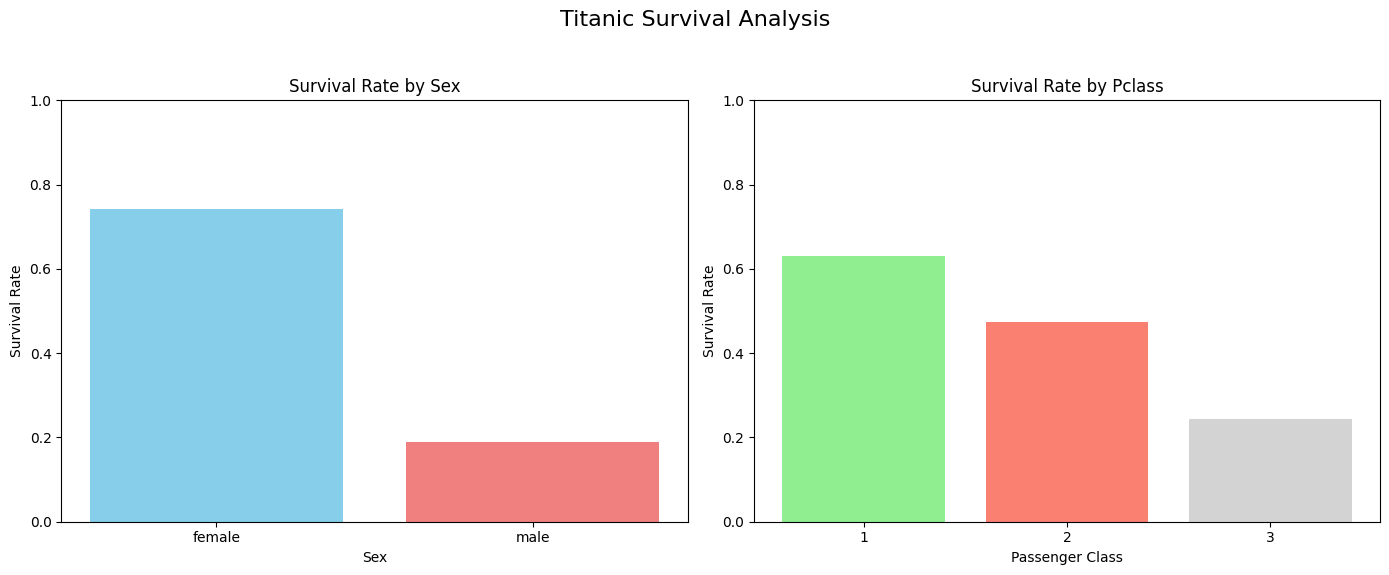

In [22]:
import matplotlib.pyplot as plt

# Create a figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Survival Rate by Sex
axes[0].bar(survival_rate_by_sex.index, survival_rate_by_sex.values, color=['skyblue', 'lightcoral'])
axes[0].set_title('Survival Rate by Sex')
axes[0].set_ylabel('Survival Rate')
axes[0].set_ylim(0, 1) # Set y-axis limits from 0 to 1
axes[0].set_xlabel('Sex')

# Plot Survival Rate by Pclass
axes[1].bar(survival_rate_by_pclass.index.astype(str), survival_rate_by_pclass.values, color=['lightgreen', 'salmon', 'lightgray'])
axes[1].set_title('Survival Rate by Pclass')
axes[1].set_ylabel('Survival Rate')
axes[1].set_ylim(0, 1) # Set y-axis limits from 0 to 1
axes[1].set_xlabel('Passenger Class')

# Add a main title to the entire figure
fig.suptitle('Titanic Survival Analysis', fontsize=16)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle

# Display the plots
plt.show()

## Prepare for GitHub

### Subtask:
Add markdown cells to your notebook to document your analysis steps, explain your code, and summarize the insights you've gained. This makes your notebook readable and shareable on GitHub.


# Titanic Survival Analysis

This notebook conducts a data analysis project using the Titanic dataset. The primary goals are to load and explore the data, perform cleaning tasks, analyze survival rates based on various factors, and visualize the key findings. The insights gained will help understand the factors influencing survival on the Titanic.

## Data Loading Overview

This section initiates the data analysis by loading the chosen dataset into a pandas DataFrame. The Titanic dataset was selected for this practice, accessed via a public URL. After ensuring all necessary libraries were imported, the dataset was successfully loaded, and its initial structure was verified using `df.head()`, confirming data readiness for subsequent exploration.

## Data Exploration and Cleaning Overview

This section focuses on the initial exploration and cleaning of the Titanic dataset. Key methods used include `df.info()` for a concise summary of the DataFrame (data types, non-null counts), `df.describe()` for statistical summaries of numerical columns, `df.isnull().sum()` to identify missing values per column, and `df.duplicated().sum()` to detect duplicate rows. Based on the analysis, it was found that the dataset is complete with no missing values and no duplicate rows, thus requiring no further cleaning steps for this phase.

## Data Analysis Overview

This section performs specific data analysis tasks on the Titanic dataset, focusing on survival rates. The primary goal is to understand the proportion of survivors based on different categorical features. This involves calculating the overall survival rate and then breaking it down by passenger sex and passenger class (`Pclass`) using aggregation (`mean()`) and grouping operations.

## Visualization of Results Overview

This section focuses on visually representing the findings from the data analysis, particularly the survival rates. Using `matplotlib.pyplot`, two bar charts are generated side-by-side: one illustrating survival rates by 'Sex' and another by 'Pclass'. Each plot is equipped with appropriate titles, labels, and y-axis limits (0 to 1) to ensure clarity and accurate interpretation of the survival proportions. A main title is also added to the entire figure to provide an overarching context for the visual analysis.

## Summary of Insights

From the data analysis and visualizations, the following key insights can be derived:

1.  **Overall Survival Rate**: The Titanic had an overall survival rate of approximately 39%.
2.  **Impact of Sex on Survival**: There was a significant disparity in survival rates between sexes. Females had a substantially higher survival rate (~74%) compared to males (~19%). This suggests a 'women and children first' protocol was largely followed during the evacuation.
3.  **Impact of Passenger Class on Survival**: Passenger class played a crucial role in survival. First-class passengers had the highest survival rate (~63%), followed by second-class passengers (~47%), while third-class passengers had the lowest survival rate (~24%). This indicates that socio-economic status and access to lifeboats likely influenced survival chances.

These findings highlight the influence of demographic and socio-economic factors on survival outcomes during the Titanic disaster.

## Final Task

### Subtask:
Save the notebook and push it to your GitHub repository.


## Summary:

### Data Analysis Key Findings

*   The Titanic dataset was successfully loaded, containing 887 entries and 8 columns, with no missing values or duplicate rows identified during the initial exploration.
*   The overall survival rate for passengers on the Titanic was approximately 39%.
*   There was a significant disparity in survival rates based on sex: females had a much higher survival rate (approximately 74.2%) compared to males (approximately 19.0%).
*   Passenger class played a crucial role in survival chances: First-class passengers had the highest survival rate (approximately 63.0%), followed by second-class passengers (approximately 47.3%), and third-class passengers had the lowest survival rate (approximately 24.4%).
*   Visualizations (bar charts) effectively illustrated the survival rates segmented by sex and passenger class, reinforcing the numerical findings.

### Insights or Next Steps

*   The findings suggest that both gender and socio-economic status (represented by passenger class) were significant factors influencing survival outcomes during the Titanic disaster, likely reflecting evacuation protocols prioritizing women and children, and access to lifeboats based on class.
*   Further analysis could involve exploring the impact of age, family size (Siblings/Spouses Aboard, Parents/Children Aboard), and fare on survival, or investigating interactions between these variables with sex and Pclass to uncover more nuanced survival patterns.
